In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, SimpleRNN
from keras import optimizers
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [ ]:
fields_listings = ['id', 'review_scores_rating']
fields_reviews = ['listing_id', 'comments']

df_listings = pd.read_csv('/content/listings.csv', skipinitialspace=True, usecols=fields_listings)
df_reviews = pd.read_csv('/content/reviews.csv', skipinitialspace=True, usecols=fields_reviews)

In [ ]:
df_reviews = df_reviews.rename(columns={'listing_id': 'id'})
print (df_reviews.head)
print (df_listings.head)

<bound method NDFrame.head of                         id                                           comments
0                     2818  Daniel is really cool. The place was nice and ...
1                     2818  Daniel is the most amazing host! His place is ...
2                     2818  We had such a great time in Amsterdam. Daniel ...
3                     2818  Very professional operation. Room is very clea...
4                     2818  Daniel is highly recommended.  He provided all...
...                    ...                                                ...
339800  824786788735749611                                                 חי
339801  824786788735749611  apparement très agréable et pratique d’accès,l...
339802  805134076304782677  Lo recomiendo 100 %, Joao es amable, esta siem...
339803  805134076304782677  Wonderful apartment very close to the centre o...
339804  805495658328856601  A truly found!! Such a lovely place and hospit...

[339805 rows x 2 columns]>
<bound

In [ ]:
df_input = pd.merge(df_reviews, df_listings, left_on='id', right_on='id')
df_input

,id,comments,review_scores_rating
0,2818,Daniel is really cool. The place was nice and ...,4.89
1,2818,Daniel is the most amazing host! His place is ...,4.89
2,2818,We had such a great time in Amsterdam. Daniel ...,4.89
3,2818,Very professional operation. Room is very clea...,4.89
4,2818,Daniel is highly recommended. He provided all...,4.89
...,...,...,...
339800,824786788735749611,חי,5.00
339801,824786788735749611,"apparement très agréable et pratique d’accès,l...",5.00
339802,805134076304782677,"Lo recomiendo 100 %, Joao es amable, esta siem...",5.00
339803,805134076304782677,Wonderful apartment very close to the centre o...,5.00


In [ ]:
df_input['review_scores_rating'] = df_input['review_scores_rating']//1
df_input['review_scores_rating']=df_input['review_scores_rating'].astype('int')
df_input['comments']=df_input['comments'].astype('str')
df_input

,id,comments,review_scores_rating
0,2818,Daniel is really cool. The place was nice and ...,4
1,2818,Daniel is the most amazing host! His place is ...,4
2,2818,We had such a great time in Amsterdam. Daniel ...,4
3,2818,Very professional operation. Room is very clea...,4
4,2818,Daniel is highly recommended. He provided all...,4
...,...,...,...
339800,824786788735749611,חי,5
339801,824786788735749611,"apparement très agréable et pratique d’accès,l...",5
339802,805134076304782677,"Lo recomiendo 100 %, Joao es amable, esta siem...",5
339803,805134076304782677,Wonderful apartment very close to the centre o...,5


In [ ]:
df_input['review_scores_rating'].value_counts()

4    325357
5     14104
3       321
2        14
1         5
0         4
Name: review_scores_rating, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_input['comments'], df_input['review_scores_rating'], test_size=0.2, random_state=101)

In [ ]:
print(X_train[3])
print(y_train[3])

Very professional operation. Room is very clean and comfortable. Location is close to tram or bus which take you to most of attractions. A great and helpful host who want to ensure you enjoy your stay.  
4


In [ ]:
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X train shape (271844,)
y train shape (271844,)
X test shape (67961,)
y test shape (67961,)


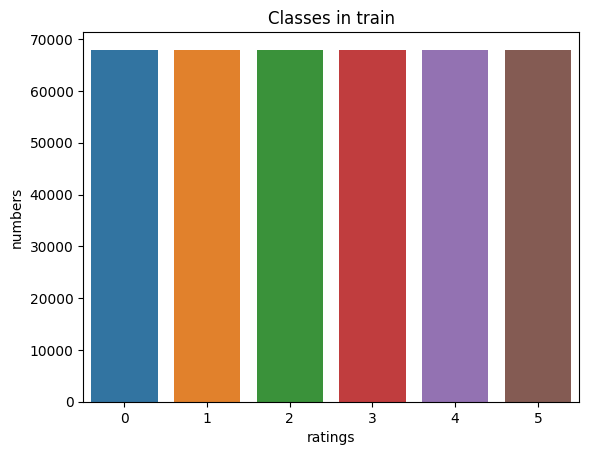

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure();
sns.countplot(y_test);
plt.xlabel("ratings");
plt.ylabel("numbers");
plt.title("Classes in train");

In [ ]:
tokenizer = Tokenizer(num_words=1000, lower=True)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
print(X_train[3])
print(y_train[3])

[27, 6, 3, 16, 4, 14, 2, 1, 21, 6, 12, 682, 13, 184, 10, 145]
4


In [ ]:
max_length = 100
X_train = pad_sequences(X_train,padding='post',maxlen=max_length)
X_test = pad_sequences(X_test,padding='post',maxlen=max_length)
print(X_train[3,:])

[ 27   6   3  16   4  14   2   1  21   6  12 682  13 184  10 145   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
num_of_classes = 6
y_train = to_categorical(y_train, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)
print(y_train.shape)
print(y_train[0])

(271844, 6)
[0. 0. 0. 0. 1. 0.]


In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0],X_train.shape[1],1)
X_test = np.array(X_test).reshape(X_test.shape[0],X_test.shape[1],1)

print('X train shape', X_train.shape)
print('X test shape', X_test.shape)

X train shape (271844, 100, 1)
X test shape (67961, 100, 1)


In [ ]:
num_classes=6
def buildRNN():
    model=Sequential()
    model.add(SimpleRNN(50,input_shape=(max_length,1),return_sequences=False))
    model.add(Dense(num_classes))
    model.add(Activation('Softmax'))
    model.summary()
    adam=optimizers.Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model

In [ ]:
model=KerasClassifier(build_fn=buildRNN,epochs=5,batch_size=50)

<ipython-input-80-40f37a82bb1c>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=RNNModel,epochs=5,batch_size=50)


In [ ]:
model.fit(X_train,y_train)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_3 (Dense)             (None, 6)                 306       
                                                                 
 activation_3 (Activation)   (None, 6)                 0         
                                                                 
Total params: 2,906
Trainable params: 2,906
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
5437/5437 [==============================] - 127s 23ms/step - loss: 0.1858 - accuracy: 0.9569
Epoch 2/5
5437/5437 [==============================] - 124s 23ms/step - loss: 0.1816 - accuracy: 0.9575
Epoch 3/5
5437/5437 [==============================] - 124s 23ms/step - loss: 0.1817 - accuracy: 0.9575
Epoch 4/5
5437/5437 [==============================] - 124s 23ms/step - loss: 0.1816 - accuracy: 0.9575
Epoch 5/5
5437/5437 [==============================] - 122s 22ms/step - loss: 0.1876 - accuracy: 0.9564


In [ ]:
y_pred=model.predict(X_test)
Y_test_=np.argmax(y_test,axis=1)
print("Accuracy of the model is: ",accuracy_score(y_pred,Y_test_))

2124/2124 [==============================] - 18s 8ms/step
Accuracy of the model is:  0.957431468047851


In [ ]:
#Method to feed the new data to predict
def pred_sentiment(str1):
  sent=[str1]
  sent=tokenizer.texts_to_sequences(sent)
  sent=np.array(sent)
  sent=pad_sequences(sent,padding='post',maxlen=max_length)
  sent=np.array(sent).reshape(sent.shape[0],sent.shape[1],1)
  pred=model.predict(np.array(sent))
  print("The rating of the review from 0 to 5 is: ",pred)

In [ ]:
pred_sentiment("Perfect for a weekend getaway")

1/1 [==============================] - 0s 74ms/step
The rating of the review from 0 to 5 is:  [4]


In [ ]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb